In [25]:
import pandas as pd
import numpy as np

In [5]:
import sys,os

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [7]:
df = pd.read_csv('/Users/alicegoulley/code/Alispirale/StarWars/raw_data/training_solutions_rev1.csv')

In [8]:
df.head(10)

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.000000,0.000000,0.000000,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.000000,0.000000,0.000000,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.000000,0.000000,0.000000,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,100122,0.738832,0.238159,0.023009,0.000000,0.238159,0.000000,0.238159,0.000000,0.238159,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,100123,0.462492,0.456033,0.081475,0.000000,0.456033,0.000000,0.456033,0.000000,0.456033,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,100128,0.687783,0.288344,0.023873,0.000000,0.288344,0.069098,0.219246,0.000000,0.288344,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,100134,0.021834,0.976952,0.001214,0.021751,0.955201,0.313077,0.642124,0.546491,0.408711,...,0.021751,0.207253,0.152044,0.187194,0.000000,0.000000,0.054649,0.081974,0.081974,0.327894
9,100143,0.269843,0.730157,0.000000,0.730157,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.168728,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [9]:
filename = sys.argv[0]
os.path.abspath(filename)

'/Users/alicegoulley/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/ipykernel_launcher.py'

In [10]:
os.path.abspath("raw_data/images_test_rev1/100913.jpg")

'/Users/alicegoulley/code/Alispirale/StarWars/raw_data/images_test_rev1/100913.jpg'

In [11]:
img = mpimg.imread(os.path.abspath("raw_data/images_test_rev1/100913.jpg"))

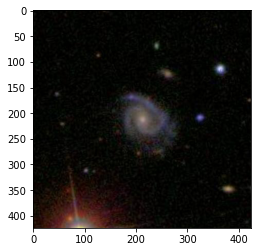

In [12]:
plt.imshow(img)

In [36]:
import tensorflow as tf

def load_image(image):
    folder = f'../raw_data/galaxy-zoo-the-galaxy-challenge/images_test_rev1/{image}'
    #imagename = random.choice(os.listdir(folder))
    img = image.open(folder)
    return np.array(img)

def load_images(df):
    img_list = []
    for _, row in df.iterrows():
        img = load_image(row["GalaxyID"])
        img_list.append(img) 
    return np.stack(img_list)

class DataGenerator(tf.keras.utils.Sequence):
    
    def __init__(self, df, batch_size=64, subset="training"):
        self.batch_size = batch_size
        self.df = df
        self.indices = self.df.index.tolist()
        self.shuffle = True
        self.on_epoch_end()
        self.subset = subset
        
    def __len__(self):
        return len(self.indices) // self.batch_size
    
    def __getitem__(self, index):
        index = self.index[index * self.batch_size:(index + 1) * self.batch_size]
        batch = [self.indices[k] for k in index]
        X, y = self.__get_data(batch)
        return X, y
    
    def __get_data(self, batch):
        df_batch = self.df.query("index in @batch") 
        X = self.__get_X_image(df_batch)
        y = self.__get_Y(df_batch)
        return X, y
    
    def __get_X_image(self, df):
        X = load_images(df)
        return X
    
    def on_epoch_end(self):
        self.index = np.arange(len(self.indices))
        if self.shuffle == True:
            np.random.shuffle(self.index)
            
    def __get_Y(self, df):
        return self.encoder.transform(np.array(df["prdtypecode"]).reshape(-1, 1)).toarray()

In [37]:
datagen = DataGenerator(df)

In [38]:
datagen.__getitem__(0)[0]

AttributeError: 'numpy.float64' object has no attribute 'open'